In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../") # go to parent dir

import numpy as np
import torch
import matplotlib.pyplot as plt
import mpmath
import networkx as nx

from metal.label_model import LabelModel, LabelModelInd
from metal.label_model.graph_utils import JunctionTree
from synthetic.generate_spa import (
    ChainDependencies,
    TreeDependencies,
    ClusterDependencies,
    DataGenerator
)
from metal.label_model.utils import (
    compute_mu,
    compute_covariance,
    compute_inv_covariance,
    print_matrix,
    visualize_matrix
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


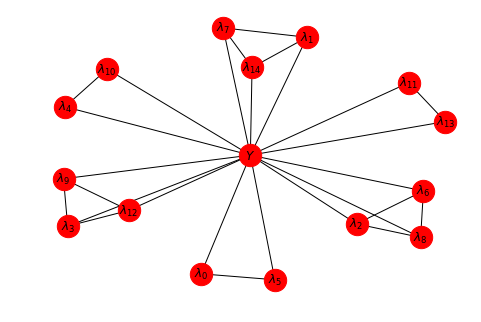

In [2]:
M = 15
N_CLUSTERS = 10
EDGE_PROB = 1.0
deps_graph = ClusterDependencies(M, N_CLUSTERS, edge_prob=EDGE_PROB)
# deps_graph = ChainDependencies(M)
deps_graph.draw()

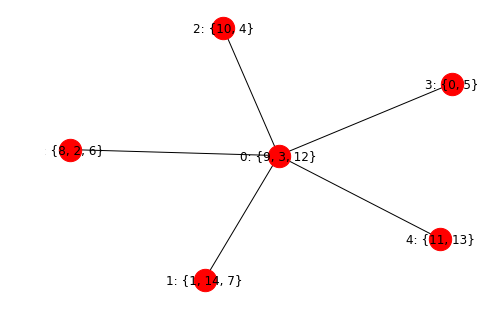

In [3]:
N = 1000 # Not used yet...
K = 2
HIGHER_ORDER_CLIQUES = True

data = DataGenerator(
    N,
    M,
    k=K,
    abstains=False,
    deps_graph=deps_graph,
    higher_order_cliques=HIGHER_ORDER_CLIQUES
)
data.jt.draw()

In [4]:
%time sigma_O = data.get_sigma_O()

CPU times: user 6.15 s, sys: 11 ms, total: 6.16 s
Wall time: 6.17 s


In [5]:
np.linalg.cond(sigma_O)

263.2256860619933

In [6]:
E_O = np.array([data.P_marginal(v) for i, v in data.jt.iter_observed()])

In [7]:
class_balance = data.get_class_balance()
class_balance

array([0.26910152, 0.73089848])

In [8]:
lm = LabelModel(k=2)

lm.train(
    sigma_O=sigma_O,
    E_O=E_O,
    junction_tree=data.jt,
    class_balance=class_balance,
    lr=0.001,
    n_epochs=10000,
    print_every=1000,
    l2=0
)

mu = data.get_mu()
np.mean(np.abs(mu - lm.mu))

Estimating Z...
[E:0]	Train Loss: 1414.06909180
[E:1000]	Train Loss: 0.00000000
[E:2000]	Train Loss: 0.00000000
[E:3000]	Train Loss: 0.00000000
[E:4000]	Train Loss: 0.00000000
[E:5000]	Train Loss: 0.00000000
[E:6000]	Train Loss: 0.00000000
[E:7000]	Train Loss: 0.00000000
[E:8000]	Train Loss: 0.00000000
[E:9000]	Train Loss: 0.00000000
[E:9999]	Train Loss: 0.00000000
Finished Training


5.720470301155227e-09